# Paper Figures

## Imports

In [2]:
# Python standard library
import sys
import csv
import os

# Scientific computing

import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage
import sklearn.mixture
import seaborn as sns; sns.set()

#plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', 'repo')
sys.path.append(PORE_STATS_BASE_DIRECTORY)
import optical_imaging as oi
import oi_file
import image_processing


# Jupyter
from IPython.display import HTML

## Load Data

In [7]:
date = '11-13-19'
particle = '/PA1'
channel = '/15_30_15'
file_index = '2'

data_base_path = 'D:/'
date = '2017/11-11-2017'
particle_type = '/293-T_0'
channel_type = '/10_20_10_1'
file_index = '0'
base_path = oi_file.data_base_path

oi_vid_file_path = base_path + date + '/'+ particle + '/' + channel + '/oi/'+ file_index+ '/bin/test_camera_0' 
oi_events_file_path = base_path + date + particle + channel + '/oi/' + file_index + '/events/test_camera_0' + '_events.json'

## Load Video

In [8]:
# Load video
reload(oi)
res_x = 880
res_y = 180
oi_fps = 8666
exposure = 25
#oi_vid = oi_file.Video(oi_vid_file_path, res_x, res_y, oi_fps, exposure)

# Load events
oi_events = oi_file.open_event_file_json(oi_events_file_path)

print 'loaded', len(oi_events), 'oi events'

loaded 18 oi events


In [60]:
oi_event = oi_events[72]
index_pos = [11,15,19,23,26]
ts = oi_event.get_tf()[index_pos]

array([33589, 33593, 33597, 33601, 33604])

## Figure #1

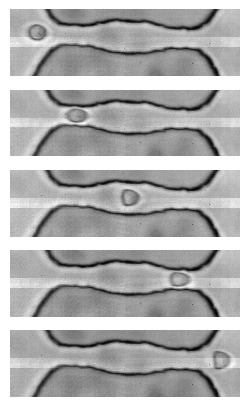

In [7]:

event_num = 72
oi_event = oi_events[event_num]
index_pos = [11,15,19,23,26]
ts = oi_event.get_tf()[index_pos]
n = len(ts)
fig, axes = plt.subplots(n,1,figsize = (5,5))

for i in range(n):
    frame = oi_vid.get_frame(int(ts[i]))
    plt.sca(axes[i])
    plt.imshow(frame, cmap = 'gray',origin = 'lower')
    plt.xticks([])
    plt.yticks([])
    

plt.show()

In [52]:
ts

NameError: name 'ts' is not defined

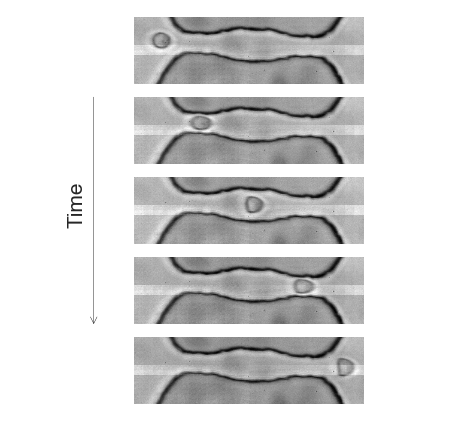

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.patch.set_facecolor('white')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

index_pos = [11,15,19,23,26]
ts = oi_event.get_tf()[index_pos]


frame = oi_vid.get_frame(ts[0])
ax1.imshow(frame, cmap = 'gray',origin = 'lower',zorder=2)
ax1.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

frame = oi_vid.get_frame(ts[1])
ax2.imshow(frame, cmap = 'gray',origin = 'lower',zorder=2)
ax2.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

frame = oi_vid.get_frame(ts[2])
ax3.imshow(frame, cmap = 'gray',origin = 'lower',zorder=2)
ax3.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

frame = oi_vid.get_frame(ts[3])
ax4.imshow(frame, cmap = 'gray',origin = 'lower',zorder=2)
ax4.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

frame = oi_vid.get_frame(ts[4])
ax5.imshow(frame, cmap = 'gray',origin = 'lower',zorder=2)
ax5.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

#ax.set_ylabel('Time',size=20)
ax.annotate('', xy=(0.1,.2), xycoords='axes fraction', xytext=(0.1,.8), 
            arrowprops=dict(arrowstyle="->", color='black'))
ax.plot(zorder=1)
plt.figtext(.15,.54,'Time',rotation=90,size = 15)
plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'deformation')
plt.show()


## Figure #2

In [9]:
calculations_base_path = oi_file.ellipse_base_path

date = '11-13-19'
particle = '/PA1'
channel = '/15_30_15'
file_index = '2'
num_files = 3

dates = [date]*num_files
particles = ['PA1']*num_files
channels = ['15_30_15']
indices = ['2','3','4']*num_files


calculations_file_paths = [calculations_base_path + dates[i] + '/' + particles[i] + '/' + channels[i] + '/' + indices[i] + '/' + 'calculations' for i in range(num_files)]


# Get header
with open(calculations_file_paths[0], 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = ',')
    header = file_reader.next()
    
header_dict = {header[i]:i for i in range(len(header))}
    
    
# Open calculations
calculationss = []
for i in range(num_files):
    calculations = np.genfromtxt(calculations_file_paths[i], delimiter = ',', skip_header = 1)    
    calculationss.append(calculations)
    
# Get number of events in each file
num_events = []
for i in range(num_files):
    num_events.append(int(np.max(calculationss[i][:,0])))

In [10]:
def generate_file_path(file_index):
    return dates[file_index] + '/' + particles[file_index] + '/' + channels[file_index] + '/' + indices[file_index] + '/'

def get_event_calculations(calculations, event_index):
    event_calculations = np.copy(calculations[calculations[:,header_dict['event_num']] == event_index])
    return event_calculations

def get_event_column(calculations, event_index, column_index):
    return np.copy(calculations[calculations[:,header_dict['event_num']] == event_index][:,column_index])

In [11]:
print header_dict
save = False

{'ellipse_num': 1, 'speed_pix/frame': 17, 'r_um': 14, 'xc_um': 5, 'r_pix': 13, 'yc_um': 8, 'a_um': 10, 'yc_pix': 7, 'speed_m/s': 18, 'tf': 2, 'a_pix': 9, 'b_um': 12, 'b_pix': 11, 'event_num': 0, 'y_pix': 6, 'xc_pix': 4, 'theta_rad': 16, 'aspect-ratio': 15, 'x_pix': 3}


In [12]:
xc_umss=[]
aspectss = []
velocitiess =[]

for i in range(num_files):
    xc_umss.append(calculationss[i][:, header_dict['xc_um']])
    aspectss.append(calculationss[i][:, header_dict['aspect-ratio']])
    velocitiess.append(calculationss[i][:, header_dict['speed_m/s']])
print(xc_umss[0])

[ -47.86629853  -47.22642054  -46.4202037  ...,  190.72171721  191.22145657
  191.4973514 ]


In [13]:
# Raw data
aspect_avgss = []
aspect_stdss = []
xc_windowss = []


for i in range(num_files):


    # Avg.
    avg_width = 6
    num_avgs = (np.max(xc_umss[i]) - np.min(xc_umss[i])) / avg_width

    xc_windows = []
    aspect_avgs = []
    aspect_stds = []
    for j in range(int(num_avgs) + 1):
        low = np.min(xc_umss[i]) + j*avg_width
        high = low + avg_width
    
        xc_windows.append((low + high)/2.)
        aspect_avgs.append(np.nanmean(aspectss[i][(xc_umss[i] > low) & (xc_umss[i] < high)]))
        aspect_stds.append(np.nanstd(aspectss[i][(xc_umss[i] > low) & (xc_umss[i] < high)]))
    
    xc_windowss.append(np.array(xc_windows))
    aspect_avgss.append(np.array(aspect_avgs))
    aspect_stdss.append(np.array(aspect_stds))
    
   
        

IOError: [Errno 2] No such file or directory: u'C:/Users/SiwyLab/Desktop/Cody/cell_research/NIH_sept2018/293-T-flow.png'

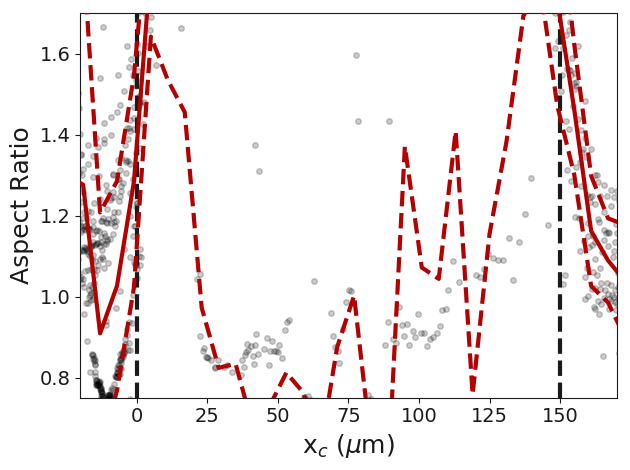

In [14]:
sns.reset_orig()
#fig, axes = plt.subplots(1,2,figsize = (10,4))
    
axis_size = 18
    
#fig.sca(axes[0])   
plt.scatter(xc_umss[0], aspectss[0],color = 'black',alpha=.2,s=16)
plt.plot(xc_windowss[0], aspect_avgss[0], zorder = 3, color = (.7,0,0), lw = 3,label = '0.1 mL/min')
plt.plot(xc_windowss[0], aspect_avgss[0]+aspect_stdss[0], zorder = 3, color = (.7,0,0), lw = 3,linestyle='--')
plt.plot(xc_windowss[0], aspect_avgss[0]-aspect_stdss[0], zorder = 3, color = (.7,0,0), lw = 3,linestyle ='--')
xposition = [0,150]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--',lw=3)
plt.xlabel('x$_{c}$ ($\mu$m)',size=axis_size)
plt.ylabel('Aspect Ratio',size=axis_size)
#plt.title('0.1 mL/min' ,size =20)
plt.tick_params(labelsize=14)
plt.xlim((-20,170))
plt.ylim((.75,1.7))

plt.tight_layout()


plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/NIH_sept2018/' +  '293-T-flow')

plt.show()

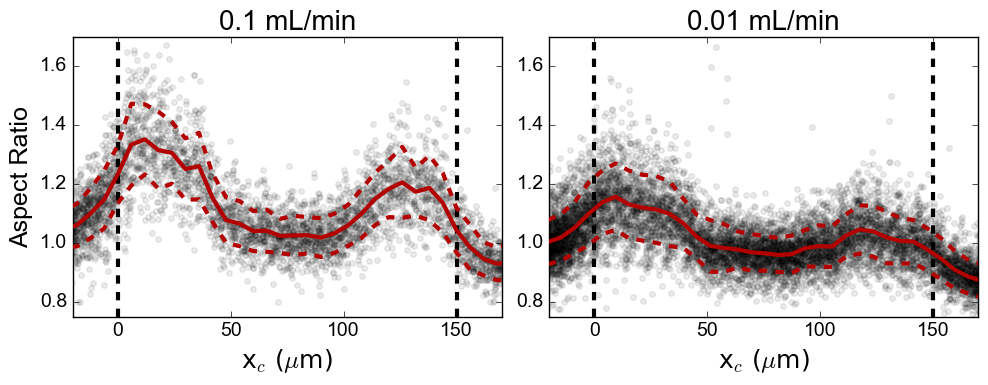

In [44]:

sns.reset_orig()
fig, axes = plt.subplots(1,2,figsize = (10,4))
    
axis_size = 18
    
fig.sca(axes[0])   
plt.scatter(xc_umss[0], aspectss[0],color = 'black',alpha=.08,s=16)
plt.plot(xc_windowss[0], aspect_avgss[0], zorder = 3, color = (.7,0,0), lw = 3,label = '0.1 mL/min')
plt.plot(xc_windowss[0], aspect_avgss[0]+aspect_stdss[0], zorder = 3, color = (.7,0,0), lw = 3,linestyle='--')
plt.plot(xc_windowss[0], aspect_avgss[0]-aspect_stdss[0], zorder = 3, color = (.7,0,0), lw = 3,linestyle ='--')
xposition = [0,150]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--',lw=3)
plt.xlabel('x$_{c}$ ($\mu$m)',size=axis_size)
plt.ylabel('Aspect Ratio',size=axis_size)
plt.title('0.1 mL/min' ,size =20)
plt.tick_params(labelsize=14)
plt.xlim((-20,170))
plt.ylim((.75,1.7))


fig.sca(axes[1])
plt.scatter(xc_umss[1], aspectss[1],color = 'black',alpha=.08,s=16)
plt.plot(xc_windowss[1], aspect_avgss[1], zorder = 3, color = (.7,0,0), lw = 3,label = '0.01 mL/min')
plt.plot(xc_windowss[1], aspect_avgss[1]+aspect_stdss[1], zorder = 3, color = (.7,0,0), lw = 3,linestyle='--')
plt.plot(xc_windowss[1], aspect_avgss[1]-aspect_stdss[1], zorder = 3, color = (.7,0,0), lw = 3,linestyle ='--')
xposition = [0,150]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--',lw=3)
plt.xlabel('x$_{c}$ ($\mu$m)',size=axis_size)
plt.ylabel('',size=axis_size)
plt.title('0.01 mL/min',size=20)
plt.tick_params(labelsize=14)
plt.xlim((-20,170))
plt.ylim((.75,1.7))

#plt.legend()






plt.tight_layout()


plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  '293-T-flowcomp')

plt.show()

In [ ]:
oi_file.ellipse_base_path

In [ ]:
# Raw data

fig, axes = plt.subplots(1,2,figsize = (18,4))
    
axis_size = 16


file_index = 0


                            

fig.sca(axes[0])
for i in range(num_events[file_index]):
    xc_ums = xc_umss[0][calculationss[0][:,0] == i]
    velocities = velocitiess[0][calculationss[0][:,0] == i]/10**6.
    
    plt.plot(xc_ums, velocities)
    

plt.title(generate_file_path(file_index))
plt.xlabel('xc')
plt.ylabel('v (m/s)')

plt.ylim(0, 6)
    




if save:
    plt.savefig(oi_file.ellipse_base_path + generate_file_path(file_index) + 'velocities.png')
    
plt.show()

## Figure #3

In [17]:
calculations_base_path = oi_file.ellipse_base_path

#num_files = 2
#dates = ['10-10-2017','11-11-2017']
#particles = ['HCT-116_1','293-T_0']
#channels = ['10-20-10_2','10-20-10_1']
#indices = ['0']*num_files

num_files = 2
dates = ['10-10-2017']*num_files
particles = ['293-T_0']*num_files
channels = ['10-20-10_1','10-20-10_3']
indices = ['0']*num_files

calculations_file_paths = [calculations_base_path + dates[i] + '/' + particles[i] + '/' + channels[i] + '/' + indices[i] + '/' + 'calculations' for i in range(num_files)]


# Get header
with open(calculations_file_paths[0], 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = ',')
    header = file_reader.next()
    
header_dict = {header[i]:i for i in range(len(header))}
    
    
# Open calculations
calculationss = []
for i in range(num_files):
    calculations = np.genfromtxt(calculations_file_paths[i], delimiter = ',', skip_header = 1)    
    calculationss.append(calculations)
    
# Get number of events in each file
num_events = []
for i in range(num_files):
    num_events.append(int(np.max(calculationss[i][:,0])))

In [35]:
avg_radius_pixss = []
avg_radius_umss = []

outside_aspectss = []
narrow_aspectss = []
narrow2_aspectss = []
cavity_aspectss = []
max_narrow_aspectss = []
for i in range(num_files):
    
    avg_radius_pixs = []
    avg_radius_ums = []
    
    outside_aspects = []
    narrow_aspects = []
    narrow2_aspects = []
    cavity_aspects = []
    max_narrow_aspects = []
    calculations = np.copy(calculationss[i])

    
    
    for j in range(num_events[i]):

        event_calculations = np.copy(calculations[calculations[:,header_dict['event_num']] == j])



        xc_ums = np.copy(event_calculations[:,header_dict['xc_um']])
        aspects = np.copy(event_calculations[:,header_dict['aspect-ratio']])
        radii_pix = np.copy(event_calculations[:,header_dict['r_pix']])
        radii_um = np.copy(event_calculations[:,header_dict['r_um']])


        avg_radius_pix = np.nanmean(radii_pix[(xc_ums > 50) & (xc_ums < 100)])
        avg_radius_um = np.nanmean(radii_um[(xc_ums > 50) & (xc_ums < 100)])
        
        outside_aspect = np.nanmean(aspects[(xc_ums > -50) & (xc_ums < 0)])
        narrow_aspect = np.nanmean(aspects[(xc_ums > 20) & (xc_ums < 40)])
        narrow2_aspect = np.nanmean(aspects[(xc_ums > 100) & (xc_ums < 150)])
        cavity_aspect = np.nanmean(aspects[(xc_ums > 50) & (xc_ums < 100)])
        max_aspect = np.max(aspects[(xc_ums > 0) & (xc_ums < 50)])

        avg_radius_pixs.append(avg_radius_pix)
        avg_radius_ums.append(avg_radius_um)
        outside_aspects.append(outside_aspect)
        narrow_aspects.append(narrow_aspect)
        narrow2_aspects.append(narrow2_aspect)
        cavity_aspects.append(cavity_aspect)
        max_narrow_aspects.append(max_aspect)


        
    avg_radius_pixss.append(avg_radius_pixs)
    avg_radius_umss.append(avg_radius_ums)
    
    outside_aspectss.append(outside_aspects)
    narrow_aspectss.append(narrow_aspects)
    narrow2_aspectss.append(narrow2_aspects)
    cavity_aspectss.append(cavity_aspects)
    max_narrow_aspectss.append(max_narrow_aspects)

In [24]:
from sklearn.cluster import KMeans


In [33]:
hct = np.column_stack((outside_aspectss[0],narrow_aspectss[0],cavity_aspectss[0],narrow2_aspectss[0]))

In [34]:
hct.shape

(171L, 4L)

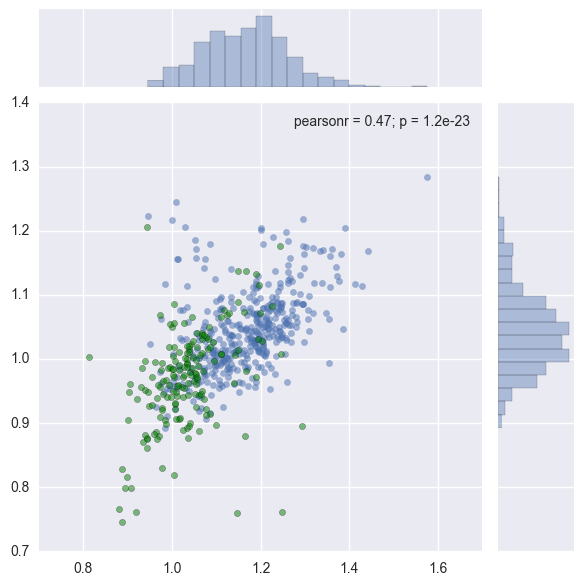

In [80]:

graph= sns.jointplot(x=np.array(outside_aspectss[1]),y=np.array(cavity_aspectss[1]),alpha=.5)

graph.x = outside_aspectss[0]
graph.y=cavity_aspectss[0]


graph.plot_joint(plt.scatter,c='g',alpha=.5)
#plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'cell_comp_p05mL')
plt.show()

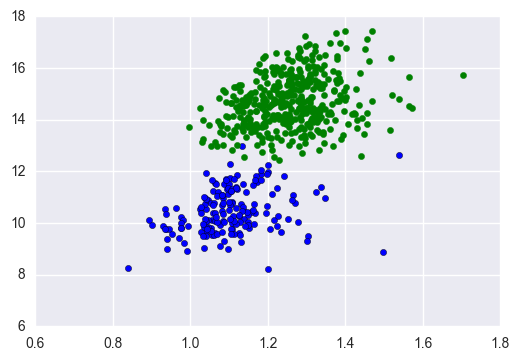

In [74]:
plt.scatter(narrow_aspectss[0],avg_radius_pixss[0])
plt.scatter(narrow_aspectss[1],avg_radius_pixss[1],color='g')
plt.show()

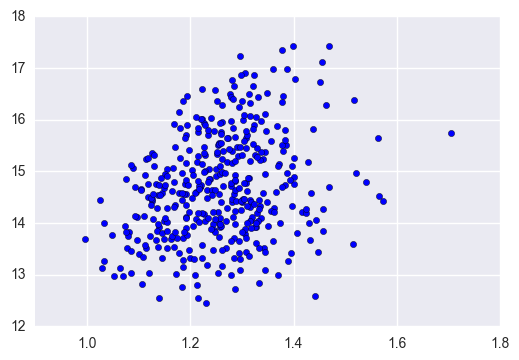

In [72]:
plt.scatter(narrow_aspectss[1],avg_radius_pixss[1])
plt.show()

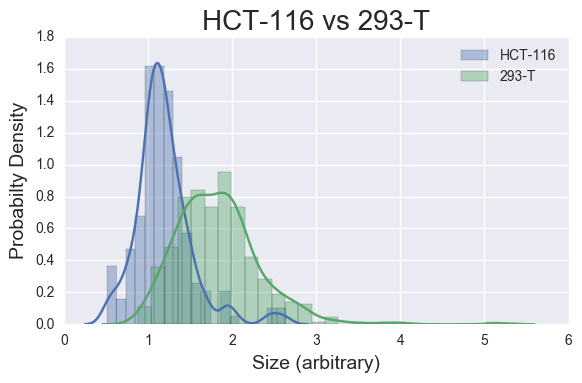

In [23]:
bins=10
norm = False
alpha=.5

sns.distplot(group_0,label ='HCT-116',norm_hist=norm)
sns.distplot(group_1,label ='293-T',norm_hist=norm)
plt.ylabel('Probabilty Density',size = 14)
plt.xlabel('Size (arbitrary)',size = 14)
plt.title('HCT-116 vs 293-T',size = 20)
plt.tight_layout()
plt.legend()

plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'hct_293T_size')
plt.show()

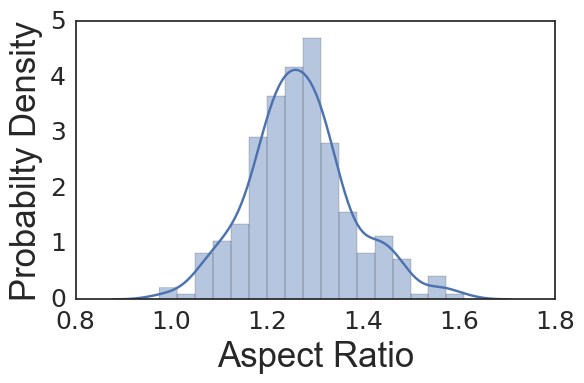

In [71]:
bins=10
norm = False
alpha=.5

sns.set_style('white')
sns.distplot(narrow_aspectss[0], label ='HCT-116')
#sns.distplot(avg_radius_pixss[1],label ='293-T',norm_hist=norm)
plt.ylabel('Probabilty Density',size = 25)
plt.xlabel('Aspect Ratio',size = 25)
#plt.title('293-T Narrow',size = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
#plt.legend()

plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/' +  '293-T_0p1mL')
plt.show()